# Query for icSrc Sources Results in NON OGA

 work with Weakly_2023_44
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/12/20
- update : 2023/12/20


In [1]:
! eups list -s | grep LOCAL

analysis_tools        LOCAL:/home/d/dagoret/repos/repos_w_2023_44/analysis_tools 	setup
atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_44/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/eups 	setup
spectractor           LOCAL:/home/d/dagoret/repos/repos_w_2023_44/Spectractor 	setup


In [2]:
! eups list -s lsst_distrib

   g4213664e8e+d053631def 	current w_2023_44 setup


In [4]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [6]:
#repo =  "/sdf/group/rubin/repo/main"
repo = "/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

## Give the collection

In [8]:
my_collection = "LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553"

## Config

- icSrc_schema
- icExp  
- icExpBackground  
- icSrc

In [9]:
datasetRefs = registry.queryDatasets(datasetType='icSrc_schema', collections=my_collection, where= "instrument='LATISS'")
#icSrc_schema = butler.get('icSrc_schema')

## icExp

In [10]:
datasetRefs = registry.queryDatasets(datasetType='icExp', collections=my_collection, where= "instrument='LATISS'")

In [11]:
all_ref_for_icSrc = []
all_dataId = []
all_icExp  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExp ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExp = butler.get('icExp', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExp.append(icExp)
    if i > 5:
        break

========================datasetType = icExp ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300524}
visit...................: 2023080300524
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230803, 'seq_num': 524, 'detector': 0}
========================datasetType = icExp ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400692}
visit...................: 2023052400692
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230524, '

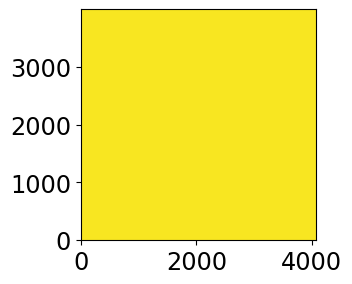

In [12]:
plt.imshow(icExp.getImage().array,origin="lower")

## icExpBackground

In [13]:
datasetRefs = registry.queryDatasets(datasetType='icExpBackground', collections=my_collection, where= "instrument='LATISS'")

In [14]:
all_ref_for_icExpBg  = []
all_dataId = []
all_icExpBg  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExpBackground ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExpBg = butler.get('icExpBackground', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icExpBg.append(icExpBg) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExpBg.append(icExpBg)
    if i > 5:
        break

========================datasetType = icExpBackground ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400510}
visit...................: 2023070400510
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230704, 'seq_num': 510, 'detector': 0}
========================datasetType = icExpBackground ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000338}
visit...................: 2023072000338
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'d

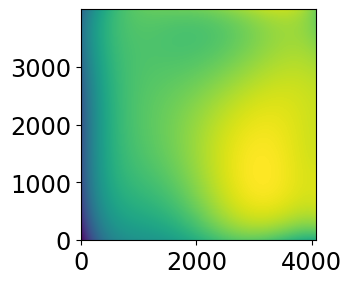

In [15]:
plt.imshow(icExpBg.getImage().array,origin="lower")

## icSrc

In [16]:
datasetRefs = registry.queryDatasets(datasetType='icSrc', collections=my_collection, where= "instrument='LATISS'")

In [17]:
datasetRefs.any() 

True

In [18]:
all_ref_for_icSrc = []
all_dataId = []
all_icSrc = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icSrc ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icSrc = butler.get('icSrc', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icSrc.append(icSrc) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icSrc.append(icSrc)
    if i > 5:
        break

========================datasetType = icSrc ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300459}
visit...................: 2021110300459
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T154824Z
{'day_obs': 20211103, 'seq_num': 459, 'detector': 0}
========================datasetType = icSrc ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300465}
visit...................: 2021110300465
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T155742Z
{'day_obs': 20211103, 'seq_num': 465, 'detector': 0}
========================datasetType = ic

In [19]:
table_sources = icSrc.asAstropy()
table_sources

id,coord_ra,coord_dec,parent,calib_psf_candidate,calib_psf_used,calib_psf_reserved,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,slot_Centroid_xErr,base_SdssCentroid_yErr,slot_Centroid_yErr,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_PsfFlux_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_notAtMaximum,slot_Centroid_flag_notAtMaximum,base_SdssCentroid_flag_resetToPeak,base_CircularApertureFlux_flag_badCentroid_resetToPeak,base_GaussianFlux_flag_badCentroid_resetToPeak,base_PsfFlux_flag_badCentroid_resetToPeak,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_resetToPeak,slot_Centroid_flag_resetToPeak,base_SdssCentroid_flag_badError,base_CircularApertureFlux_flag_badCentroid_badError,base_GaussianFlux_flag_badCentroid_badError,base_PsfFlux_flag_badCentroid_badError,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_badError,slot_Centroid_flag_badError,base_FPPosition_x,base_FPPosition_y,base_FPPosition_flag,base_FPPosition_missingDetector_flag,base_Jacobian_value,base_Jacobian_flag,ext_shapeHSM_HsmSourceMoments_x,slot_Shape_x,ext_shapeHSM_HsmSourceMoments_y,slot_Shape_y,ext_shapeHSM_HsmSourceMoments_xx,slot_Shape_xx,ext_shapeHSM_HsmSourceMoments_yy,slot_Shape_yy,ext_shapeHSM_HsmSourceMoments_xy,slot_Shape_xy,ext_shapeHSM_HsmSourceMoments_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,ext_shapeHSM_HsmSourceMoments_flag_no_pixels,base_GaussianFlux_flag_badShape_no_pixels,slot_Shape_flag_no_pixels,ext_shapeHSM_HsmSourceMoments_flag_not_contained,base_GaussianFlux_flag_badShape_not_contained,slot_Shape_flag_not_contained,ext_shapeHSM_HsmSourceMoments_flag_parent_source,base_GaussianFlux_flag_badShape_parent_source,slot_Shape_flag_parent_source,ext_shapeHSM_HsmSourceMoments_flag_galsim,base_GaussianFlux_flag_badShape_galsim,slot_Shape_flag_galsim,ext_shapeHSM_HsmSourceMoments_flag_edge,base_GaussianFlux_flag_badShape_edge,slot_Shape_flag_edge,base_CircularApertureFlux_3_0_instFlux,base_CircularApertureFlux_3_0_instFluxErr,base_CircularApertureFlux_3_0_flag,base_CircularApertureFlux_3_0_flag_apertureTruncated,base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_4_5_instFlux,base_CircularApertureFlux_4_5_instFluxErr,base_CircularApertureFlux_4_5_flag,base_CircularApertureFlux_4_5_flag_apertureTruncated,base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated,base_CircularApertureFlux_6_0_instFlux,base_CircularApertureFlux_6_0_instFluxErr,base_CircularApertureFlux_6_0_flag,base_CircularApertureFlux_6_0_flag_apertureTruncated,base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_9_0_instFlux,base_CircularApertureFlux_9_0_instFluxErr,base_CircularApertureFlux_9_0_flag,base_CircularApertureFlux_9_0_flag_apertureTruncated,base_CircularApertureFlux_9_0_f

## src

In [18]:
datasetRefs = butler.registry.queryDatasets(datasetType='src', collections=my_collection, where= "instrument='LATISS'")

In [19]:
all_ref_for_src = []
all_dataId = []
all_src = []
all_exposures = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = src ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    src = butler.get('src', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_src.append(src)
    if i > 5:
        break

========================datasetType = src ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400657}
visit...................: 2023052400657
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230524, 'seq_num': 657, 'detector': 0}
========================datasetType = src ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400580}
visit...................: 2023070400580
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230704, 'seq_

In [22]:
datasetRefs.any()

False

# CharacterizeImage

- characterizeImage_config
- characterizeImage_metadata
- characterizeImage_log 

## characterizeImage_config

In [20]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_config', collections=my_collection, where= "instrument='LATISS'")
#conf = butler.get('characterizeImage_config')

In [21]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_config ============================================")
    print("fullId..................:",ref.dataId.full)
    cf = butler.get('characterizeImage_config', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    if i > 2:
        break

========================datasetType = characterizeImage_config ============================================
fullId..................: {}


ValueError: Failure from formatter 'lsst.pipe.base.formatters.pexConfig.PexConfigFormatter' for dataset d8107112-0832-48b8-aba4-a80780ec0f01 (characterizeImage_config from s3://rubin-summit-users/LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z/characterizeImage_config/characterizeImage_config_LATISS_runs_AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB_w_2023_46_PREOPS-4553_20231117T150928Z.py): 'ComputeExposureSummaryStatsConfig' object has no attribute 'starSelector'

In [30]:
cf.to_dict()

NameError: name 'cf' is not defined

## characterizeImage_metadata

In [23]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_metadata', collections=my_collection, where= "instrument='LATISS'")

In [24]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    md = butler.get('characterizeImage_metadata', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 2:
        break

========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100332}
visit...................: 2023051100332
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230511, 'seq_num': 332, 'detector': 0}
========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052300636}
visit...................: 2023052300636
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-455

In [ ]:
md.

In [26]:
md.to_dict()

{'characterizeImage': {'__version__': 1,
  'runStartUtc': ['2023-11-17T17:07:06.989605'],
  'runStartCpuTime': [21.244996714],
  'runStartUserTime': [18.565867],
  'runStartSystemTime': [2.679119],
  'runStartMaxResidentSetSize': [1879609344],
  'runStartMinorPageFaults': [803789],
  'runStartMajorPageFaults': [61],
  'runStartBlockInputs': [11744],
  'runStartBlockOutputs': [1052248],
  'runStartVoluntaryContextSwitches': [45390],
  'runStartInvoluntaryContextSwitches': [1275],
  'detectMeasureAndEstimatePsfStartUtc': ['2023-11-17T17:07:08.935282',
   '2023-11-17T17:07:17.916556'],
  'detectMeasureAndEstimatePsfStartCpuTime': [22.244038698, 27.776319442],
  'detectMeasureAndEstimatePsfStartUserTime': [19.511605, 24.638144],
  'detectMeasureAndEstimatePsfStartSystemTime': [2.732419, 3.138165],
  'detectMeasureAndEstimatePsfStartMaxResidentSetSize': [1879609344,
   1879609344],
  'detectMeasureAndEstimatePsfStartMinorPageFaults': [835198, 920617],
  'detectMeasureAndEstimatePsfStartMajo

## characterizeImage_log

In [27]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_log', collections=my_collection, where= "instrument='LATISS'")

In [28]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    log = butler.get('characterizeImage_log', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 5:
        break

========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300352}
visit...................: 2023080300352
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230803, 'seq_num': 352, 'detector': 0}
========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600560}
visit...................: 2023070600560
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-455

In [29]:
print(log)

INFO 2023-11-17T17:11:08.398460+00:00 lsst.ctrl.mpexec.singleQuantumExecutor singleQuantumExecutor.py:204 - Preparing execution of quantum for label=characterizeImage dataId={instrument: 'LATISS', detector: 0, visit: 2023070600440, ...}.
INFO 2023-11-17T17:11:08.601549+00:00 lsst.ctrl.mpexec.singleQuantumExecutor singleQuantumExecutor.py:256 - Constructing task and executing quantum for label=characterizeImage dataId={instrument: 'LATISS', detector: 0, visit: 2023070600440, ...}.
INFO 2023-11-17T17:11:15.199823+00:00 lsst.characterizeImage characterizeImage.py:512 - PSF estimation initialized with 'simple' PSF
INFO 2023-11-17T17:11:15.821129+00:00 lsst.characterizeImage.repair repair.py:229 - Identified and kept 39 cosmic rays.
INFO 2023-11-17T17:11:17.252640+00:00 lsst.characterizeImage.detection detection.py:560 - Setting factor for negative detections equal to that for positive detections: 1.000000
INFO 2023-11-17T17:11:18.442909+00:00 lsst.characterizeImage.detection detection.py:6